## Data Engineering

In [3]:
# another DF for pre-processing
new_df = df.copy()
new_df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


#### Ensuring no _NULL_ values 
As there are rows with _NULL_ values, it may cause unneccessary noise and affect our model's accuracies. Hence, we will be removing them from the dataset.

In [4]:
# number of null values
nan_count = new_df.isna().sum()
print(nan_count )

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64


#### In general, proportion of null values are small (4% of data); we will simply remove them from the dataset instead of replacing them, as dropping them will not significantly affect the analysis.

In [5]:
new_df.dropna(axis = 0, how="any", inplace = True)

In [6]:
new_df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [7]:
print('Now, there are {} rows & columns respectively after removing NULL values.'.format(np.shape(new_df)))

Now, there are (4025, 9) rows & columns respectively after removing NULL values.


#### Ensuring all data is of the appropriate data type

In [8]:
# datatypes of columns
print(new_df.dtypes)

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object


In [9]:
# converting Price from float to int
new_df = new_df.astype({'Price':'int64'})

In [10]:
# datatypes of columns after conversion
print(new_df.dtypes)

Brand            object
Price             int64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object


In [11]:
new_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Removing outliers
Outliers causes  measurement errors, data corruption, or simply represent extreme values in the underlying distribution. Hence we will remove them from the dataset.

[Text(0.5, 0, 'Mileage')]

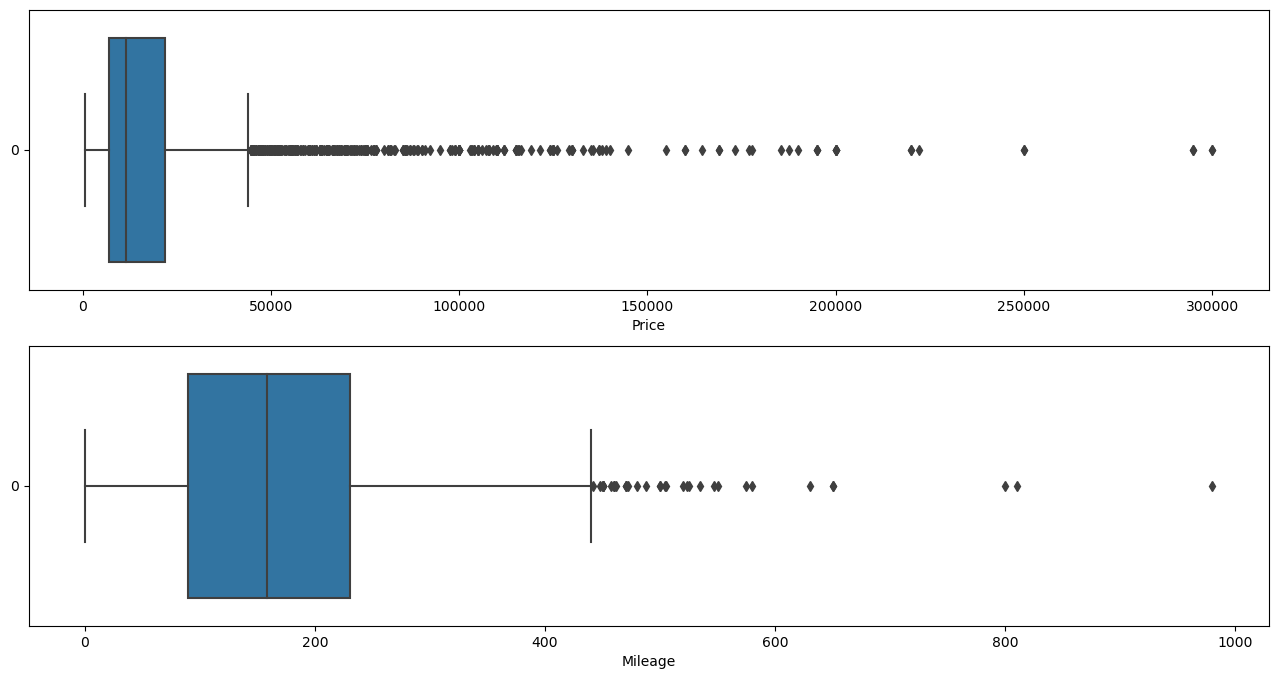

In [12]:
f, axes = plt.subplots(2, 1, figsize=(16, 8))
sb.boxplot(data = new_df['Price'], orient = "h",ax = axes[0]).set(xlabel='Price')
sb.boxplot(data = new_df['Mileage'], orient = "h", ax = axes[1]).set(xlabel='Mileage')

As we can see from the boxplots on Mileage and Price above, we can see a relatively significant number of outliers for Price and Mileage (defined by datapoints past the boxplots whiskers). We will use the IQR method to eliminate outliers.

In [13]:
#create a function to find outliers using IQR
def find_outliers_IQR(new_df):

   q1=new_df.quantile(0.25)

   q3=new_df.quantile(0.75)

   IQR=q3-q1

   outliers = new_df[((new_df<(q1-1.5*IQR)) | (new_df>(q3+1.5*IQR)))]

   return outliers

In [14]:
# outliers for Price
outliers = find_outliers_IQR(new_df['Price'])

print("number of outliers for Price: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers for Price: 355
max outlier value: 300000
min outlier value: 44600


In [15]:
# Replace data points that lie outside of the lower and the upper bound with a NULL value.
for x in ['Price']:
    q75,q25 = np.percentile(new_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    new_df.loc[new_df[x] < min,x] = np.nan
    new_df.loc[new_df[x] > max,x] = np.nan

In [16]:
# Drop rows with outliers
new_df = new_df.dropna(axis = 0)

In [17]:
#copy of DataFramed new_df for EDA later
vis_df= pd.DataFrame(new_df)

In [18]:
new_df.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV
10,Renault,11950.0,vagon,177,1.5,Diesel,yes,2011,Megane


In [19]:
print('Now, there are {} rows & columns respectively after removing Outliers.'.format(np.shape(new_df)))

Now, there are (3670, 9) rows & columns respectively after removing Outliers.


## Feature Engineering

### Categorical Features
Most categorical features in datasets are stored as string objects, which makes it hard for machine learning models to interpret and use. Hence we will need to convert these datas into more interpretable format.

### One-hot encoding for Brand, Body, Engine Type & Model
We will be using One-hot encoding to convert the categorical data into numeric data by splitting the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value. E.g. for column Brand, we’ll get seven new columns, one for each Brand — Audi, Mercedes-Benz, BMW...

In [20]:
categorical = ['Brand', 'Body','Engine Type', 'Model']

In [21]:
new_df = pd.get_dummies(new_df, columns = categorical)

In [22]:
new_df.head()

,Price,Mileage,EngineV,Registration,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,yes,1991,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,yes,1999,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,yes,2003,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,yes,2007,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,yes,2011,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Label encoding for Registration
We will be using Label Encoding to represent categorical values in column Registration as numbers. 
- Registered: 1 ; Not-registered: 0

In [23]:
new_df['Registration'].unique()

array(['yes', 'no'], dtype=object)

In [24]:
label_encoder = preprocessing.LabelEncoder()

In [25]:
new_df['Registration']= label_encoder.fit_transform(new_df['Registration'])

In [26]:
new_df.head(100)

,Price,Mileage,EngineV,Registration,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1,1991,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1,1999,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,1,2003,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,1,2007,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,1,2011,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,19200.0,190,2.7,1,2005,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,11100.0,119,2.4,1,2008,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
115,8200.0,139,1.5,1,2012,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
116,10300.0,235,2.0,1,2007,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Numeric Features

By scaling numeric features, we will ensure that they have similar ranges and distributions. This is significant because many machine learning algorithms rely on the assumption that features are similar. If the features have different ranges, some may dominate the model and influence outcomes more than others. Scaling numeric data converts them into a standardized form suitable for machine learning.

In [27]:
numerical = ['Mileage', 'EngineV', 'Registration', 'Year']

In [28]:
# Scale numerical features using the StandardScaler function
scaler = StandardScaler()
new_df[numerical] = scaler.fit_transform(new_df[numerical])

#### Results after Standardization will be shown by a Violin plot under Exploratory Data Analysis.